In [88]:
!pip install transformers
!pip install tensorflow

In [89]:
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split



In [90]:
from transformers import pipeline
classifier = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment')
sentence = [ 'أنا لست بخير']
classifier(sentence)


[{'label': 'negative', 'score': 0.6131932735443115}]

In [91]:
# prompt: give me list of arabic sentiment analysis statement and classify it by my classifier

# Define a list of Arabic sentiment analysis statements
arabic_statements = [
    "أنا سعيد للغاية اليوم.",
    "أنا أشعر بالإحباط الشديد.",
    "أنا متفائل بشأن المستقبل.",
    "أنا خائف من المجهول.",
    "أنا ممتن لكل ما لدي.",
    "أنا غاضب من الوضع الحالي.",
    "أنا حزين على ما حدث.",
    "أنا متعب للغاية.",
    "أنا أشعر بالملل.",
    "أنا متشوق لمعرفة ما سيحدث بعد ذلك."
]
classifier(arabic_statements)


[{'label': 'positive', 'score': 0.975980818271637},
 {'label': 'negative', 'score': 0.881868839263916},
 {'label': 'positive', 'score': 0.9848270416259766},
 {'label': 'negative', 'score': 0.6189293265342712},
 {'label': 'positive', 'score': 0.9870821237564087},
 {'label': 'negative', 'score': 0.9519293308258057},
 {'label': 'negative', 'score': 0.9774563908576965},
 {'label': 'negative', 'score': 0.974073588848114},
 {'label': 'negative', 'score': 0.9302788376808167},
 {'label': 'positive', 'score': 0.9862834215164185}]

In [92]:
import torch

In [93]:
torch.cuda.is_available()

True

In [94]:
torch.cuda.current_device()

0

In [95]:
classifier = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment',device=0)

In [96]:
df_ = pd.read_csv("CompanyReviews.csv")

In [97]:
df_.head()

,Unnamed: 0,review_description,rating,company
0,0,رائع,1.0,talbat
1,1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1.0,talbat
2,2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1.0,talbat
3,3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1.0,talbat
4,4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1.0,talbat


In [98]:
df=df_[['rating', 'review_description']].copy()

In [99]:
df = pd.DataFrame(df)
df['rating'] = df['rating'].apply(lambda x: 'positive' if x == 1 else 'negative' if x < 0 else 'natural')

<Axes: >

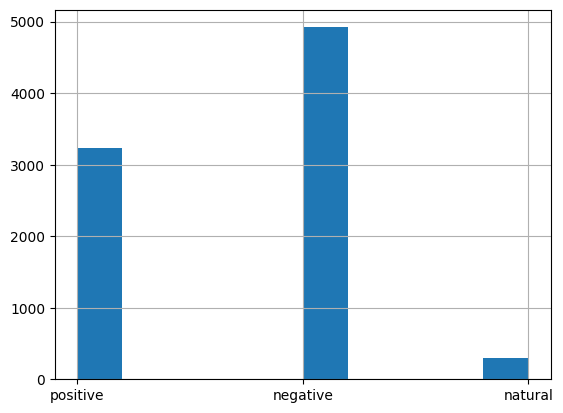

In [100]:
df['rating'].hist()

In [101]:
df=df[df.rating != 'nautral'].copy()

In [102]:
target_map={'positive':1, 'negative':0}
df['target']= df['rating'].map(target_map)

In [103]:
df.head()

,rating,review_description,target
0,positive,رائع,1.0
1,positive,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1.0
2,negative,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,0.0
3,negative,لماذا لا يمكننا طلب من ماكدونالدز؟,0.0
4,negative,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,0.0


In [104]:
len(df)

8455

In [105]:
texts = df['review_description'].tolist()
texts


['رائع',
 'برنامج رائع جدا يساعد على تلبيه الاحتياجات بشكل اسرع',
 'التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال بالشبكة..مع انه النت عندي تمام شو الحل??',
 'لماذا لا يمكننا طلب من ماكدونالدز؟',
 'البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكون فاتحه بقاله كده اكتر من شهر',
 'أصبح غالي جداً',
 'جميل جدا رائع. . .',
 'للأسف الواحد ينصدم بعد زيادة الاسعار و للاسف بعض المطاعم اصبحت معاملتهم رديئة',
 'برنامج توترز توصيل احلى من برنامجكم فاشل',
 'كتير في تحسن خدمة العملاء لطفين في بعض الاخطاء التقنية لكن بتصلحوها بسرعة وبعض التاخير سياسيتكم وتسويقكم صار افضل من كريم بالنسبة الي متفقين',
 'ممتاز',
 'اسعارهم اغلا من المحلات ب كثير و بحطولك توصيل مجاني حكي فاضي التطبيق لا انصح به',
 'التطيبق لايعمل بغداد',
 'غدآ السبت الأحد الأربعاء والخميس',
 'فاااااشل جدا البحث ما بعطي فائدة يتم كتابه إسم المطعم ومع ذلك البحث لا يظهر المطعم المطلوب يقوم بإعطاء مطاعم على مزاجه',
 'هلا',
 'جامد',
 'نزلته ومفيش الخصم اللي قلته عليه علي أول 3طلبات اعمل ايه عشان يطبق',
 'جيد جدن',
 'الضريبه عالية جداً',
 'التطبيق 

In [106]:
df['review_description'] = df['review_description'].astype(str)

In [107]:
import re
#text= df['review_description']
def remove_symbols(text):
    return re.sub(r'[^\w\s]', '', text)
df['review_description'] = df['review_description'].apply(remove_symbols)

In [108]:
texts = df['review_description'].tolist()
texts

['رائع',
 'برنامج رائع جدا يساعد على تلبيه الاحتياجات بشكل اسرع',
 'التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال بالشبكةمع انه النت عندي تمام شو الحل',
 'لماذا لا يمكننا طلب من ماكدونالدز',
 'البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكون فاتحه بقاله كده اكتر من شهر',
 'أصبح غالي جدا',
 'جميل جدا رائع  ',
 'للأسف الواحد ينصدم بعد زيادة الاسعار و للاسف بعض المطاعم اصبحت معاملتهم رديئة',
 'برنامج توترز توصيل احلى من برنامجكم فاشل',
 'كتير في تحسن خدمة العملاء لطفين في بعض الاخطاء التقنية لكن بتصلحوها بسرعة وبعض التاخير سياسيتكم وتسويقكم صار افضل من كريم بالنسبة الي متفقين',
 'ممتاز',
 'اسعارهم اغلا من المحلات ب كثير و بحطولك توصيل مجاني حكي فاضي التطبيق لا انصح به',
 'التطيبق لايعمل بغداد',
 'غدآ السبت الأحد الأربعاء والخميس',
 'فاااااشل جدا البحث ما بعطي فائدة يتم كتابه إسم المطعم ومع ذلك البحث لا يظهر المطعم المطلوب يقوم بإعطاء مطاعم على مزاجه',
 'هلا',
 'جامد',
 'نزلته ومفيش الخصم اللي قلته عليه علي أول 3طلبات اعمل ايه عشان يطبق',
 'جيد جدن',
 'الضريبه عالية جدا',
 'التطبيق صار سيء كث

In [115]:
predictions = classifier(texts)

In [110]:
predictions

[{'label': 'positive', 'score': 0.9791091680526733},
 {'label': 'positive', 'score': 0.960589587688446},
 {'label': 'negative', 'score': 0.7911897301673889},
 {'label': 'neutral', 'score': 0.9744454026222229},
 {'label': 'neutral', 'score': 0.6604955792427063},
 {'label': 'positive', 'score': 0.5611773729324341},
 {'label': 'positive', 'score': 0.9804532527923584},
 {'label': 'negative', 'score': 0.9944329857826233},
 {'label': 'negative', 'score': 0.9926905035972595},
 {'label': 'negative', 'score': 0.6241870522499084},
 {'label': 'positive', 'score': 0.9734458327293396},
 {'label': 'negative', 'score': 0.9467275142669678},
 {'label': 'negative', 'score': 0.6409887075424194},
 {'label': 'neutral', 'score': 0.9264733791351318},
 {'label': 'negative', 'score': 0.9938938021659851},
 {'label': 'positive', 'score': 0.6898390054702759},
 {'label': 'positive', 'score': 0.9795265793800354},
 {'label': 'neutral', 'score': 0.9528287649154663},
 {'label': 'positive', 'score': 0.9643803834915161}

In [111]:
probs = [d['score'] if d['label'].startswith('p') else 1 - d['score'] \
         for d in predictions]
probs

[0.9791091680526733,
 0.960589587688446,
 0.20881026983261108,
 0.0255545973777771,
 0.3395044207572937,
 0.5611773729324341,
 0.9804532527923584,
 0.005567014217376709,
 0.0073094964027404785,
 0.37581294775009155,
 0.9734458327293396,
 0.05327248573303223,
 0.35901129245758057,
 0.07352662086486816,
 0.006106197834014893,
 0.6898390054702759,
 0.9795265793800354,
 0.04717123508453369,
 0.9643803834915161,
 0.030575573444366455,
 0.012382686138153076,
 0.4333506226539612,
 0.9096992611885071,
 0.02594846487045288,
 0.627358615398407,
 0.48923856019973755,
 0.33949506282806396,
 0.01424795389175415,
 0.007549107074737549,
 0.27940505743026733,
 0.08451932668685913,
 0.24902337789535522,
 0.0345497727394104,
 0.005371510982513428,
 0.012336552143096924,
 0.9394821524620056,
 0.500432550907135,
 0.3883934020996094,
 0.12431323528289795,
 0.823779284954071,
 0.0054909586906433105,
 0.11638730764389038,
 0.35725194215774536,
 0.015239298343658447,
 0.4044076204299927,
 0.9809726476669312,


In [112]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

preds = np.array(preds)

In [113]:
print("acc:", np.mean(df['target']== preds))

acc: 0.5820224719101124


In [119]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [120]:
df.isnull().sum()

rating                  0
review_description      0
target                299
dtype: int64

In [121]:
df = df.dropna()

In [132]:
cm = confusion_matrix(df['rating'], preds, normalize= 'true')
cm

ValueError: Found input variables with inconsistent numbers of samples: [8156, 8455]